## EN3160 - Assignment 1 on Intensity Transformations and Neighborhood Filtering

### Kodikara U. S. S. 210293K

#### Question 01

256


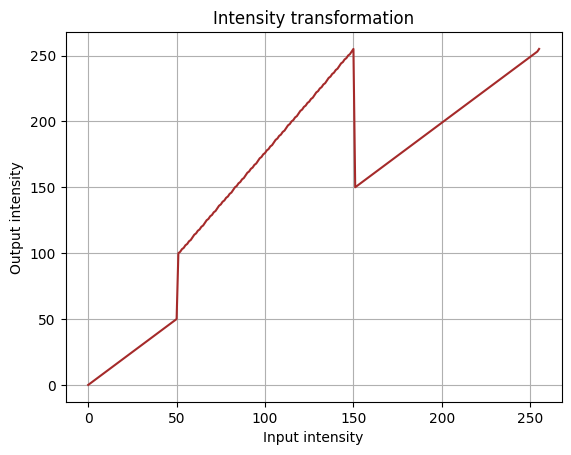

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define each segment
t1 = np.linspace(0, 50, 51).astype('uint8')     # 50 samples from 0 to 50
t2 = np.linspace(50, 100, 0).astype('uint8')    # 50 samples at a constant value 50
t3 = np.linspace(100, 255, 100).astype('uint8')  # 100 samples from 50 to 255
t4 = np.linspace(255, 150, 0).astype('uint8') # 105 samples from 255 to 150 (decreasing)
t5 = np.linspace(150, 255, 105).astype('uint8') # 105 samples from 150 to 255

# Concatenate all segments to form the complete transformation
transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype('uint8')

# Check the length of the final transformation
print(len(transform))  

# Plot the transformation
plt.plot(transform, color='brown')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.title('Intensity transformation')
plt.grid(True)

# Show the plot
plt.show()


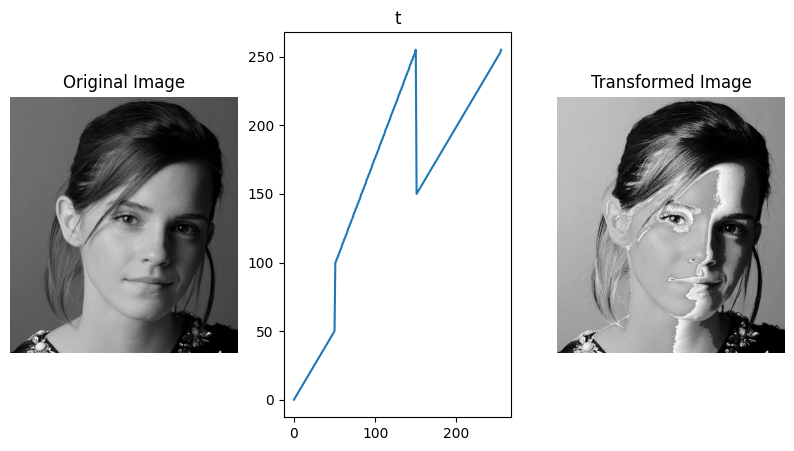

In [26]:
f= cv.imread('a1images\emma.jpg', cv.IMREAD_GRAYSCALE) # Read the image

assert f is not None, "Image not found"  # Check if the image is loaded
g = cv.LUT(f, transform) # Apply the transformation to the image

fig, ax = plt.subplots(1, 3, figsize=(10, 5)) # Create a figure with 3 subplots
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(transform)
ax[1].set_title('t')
ax[2].imshow(g, cmap='gray')
ax[2].set_title('Transformed Image')   
ax[2].axis('off')
plt.show()

#### Question 02

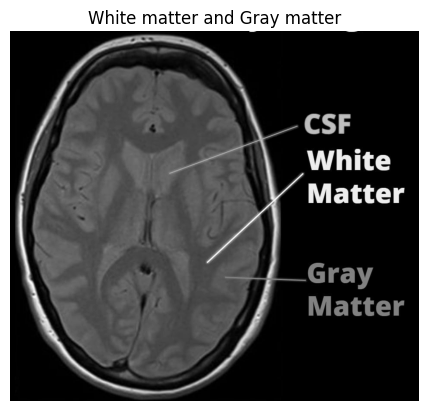

In [35]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

brain_proton_img = cv.imread("a1images/ref_brain.png", cv.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(brain_proton_img, cmap='gray')
plt.title("White matter and Gray matter")
plt.axis('off')
plt.show()

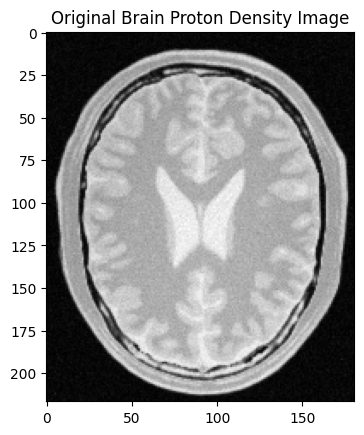

(217, 181)

In [38]:
# Load the brain proton density image
brain_proton_img = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(brain_proton_img, cmap='gray')
plt.title("Original Brain Proton Density Image")
plt.show()

# Display image shape
brain_proton_img.shape

White Matter Intensity: 177
Gray Matter Intensity: 214


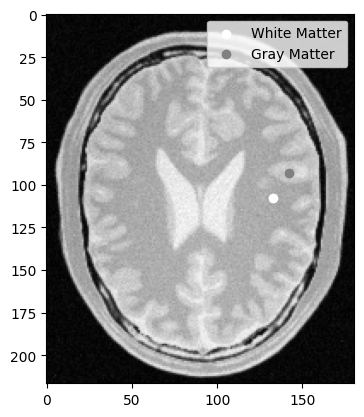

In [43]:
white_matter_point = 133, 108
gray_matter_point = 142, 93

# Show the points in the brain proton density image
plt.imshow(brain_proton_img, cmap="gray")
plt.scatter(white_matter_point[0], white_matter_point[1], color='white', label='White Matter')
plt.scatter(gray_matter_point[0], gray_matter_point[1], color='gray', label='Gray Matter')
plt.legend()

# Get pixel values
white_matter_intensity = brain_proton_img[white_matter_point]
gray_matter_intensity = brain_proton_img[gray_matter_point]

# Print pixel values
print(f"White Matter Intensity: {white_matter_intensity}")
print(f"Gray Matter Intensity: {gray_matter_intensity}")

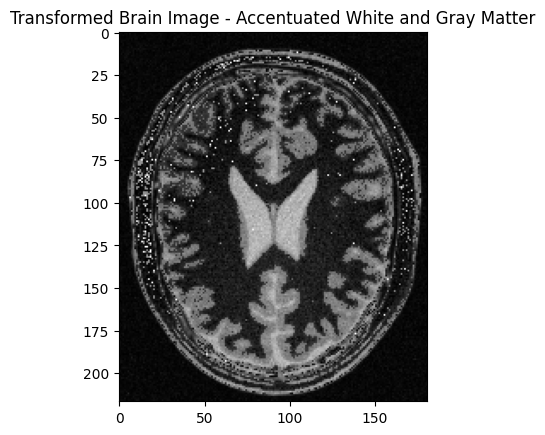

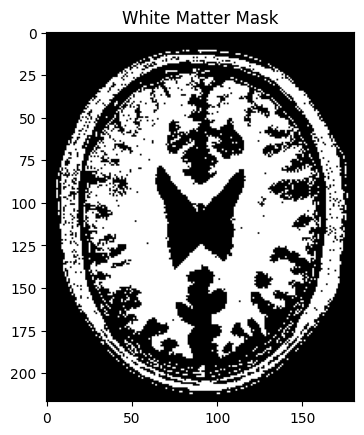

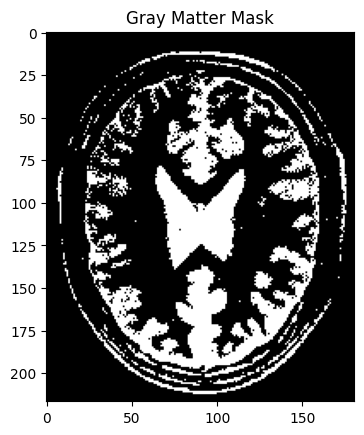

In [46]:
import numpy as np

# Copying the image to avoid modifying the original image
transformed_image = np.copy(brain_proton_img)

# Apply transformation for white matter (190 <= pixel <= 250) # white matter is brighter than gray
gray_matter_mask = (brain_proton_img >= 190) & (brain_proton_img <= 250)
transformed_image[gray_matter_mask] = 1.75 * brain_proton_img[gray_matter_mask] + 30

# Apply transformation for gray matter (150 <= pixel <= 189) # gray matter is darker than white
white_matter_mask = (brain_proton_img >= 150) & (brain_proton_img <= 189)
transformed_image[white_matter_mask] = 1.55 * brain_proton_img[white_matter_mask] + 22.5

# Display the transformed image
plt.imshow(transformed_brain_img, cmap='gray')
plt.title("Transformed Brain Image - Accentuated White and Gray Matter")
plt.show()

plt.imshow(white_matter_mask, cmap='gray')
plt.title("White Matter Mask")
plt.show()

plt.imshow(gray_matter_mask, cmap='gray')
plt.title("Gray Matter Mask")
plt.show()

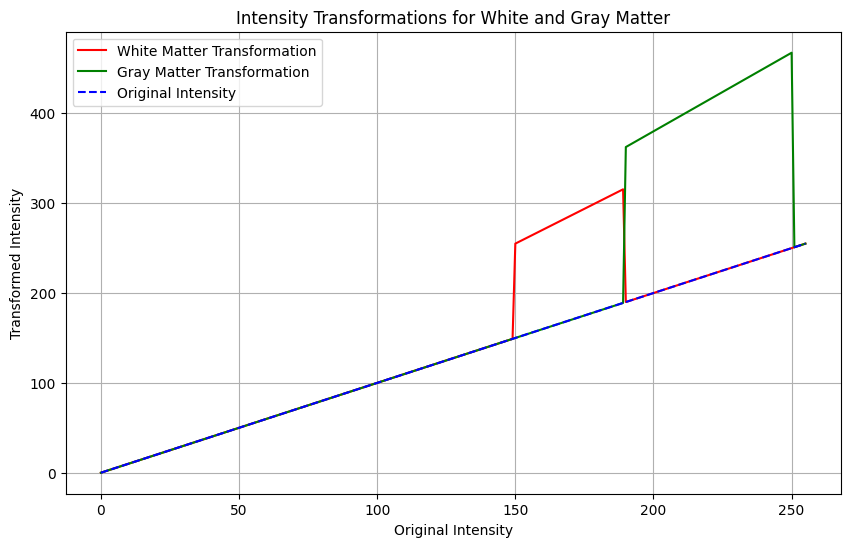

In [48]:
# Plot intensity transformation curves
x_vals = np.arange(0, 256)  # Intensity range (0-255)
gray_matter_transformed = np.array([1.75 * x + 30 if 190 <= x <= 250 else x for x in x_vals])
white_matter_transformed = np.array([1.55 * x + 22.5 if 150 <= x <= 189 else x for x in x_vals])

# Plot the intensity transformations
plt.figure(figsize=(10, 6))
plt.plot(x_vals, white_matter_transformed, label='White Matter Transformation', color='red')
plt.plot(x_vals, gray_matter_transformed, label='Gray Matter Transformation', color='green')
plt.plot(x_vals, x_vals, label='Original Intensity', linestyle='--', color='blue')  # Identity line
plt.title('Intensity Transformations for White and Gray Matter')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid(True)
plt.show()

#### Question 03

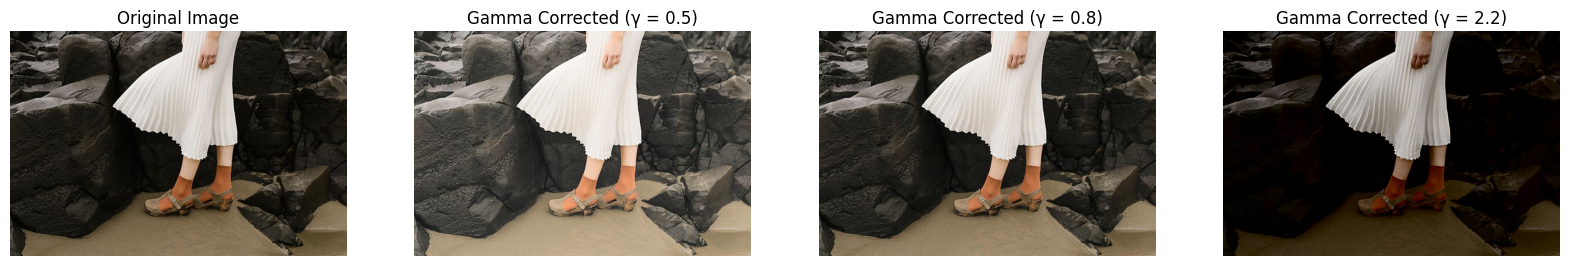

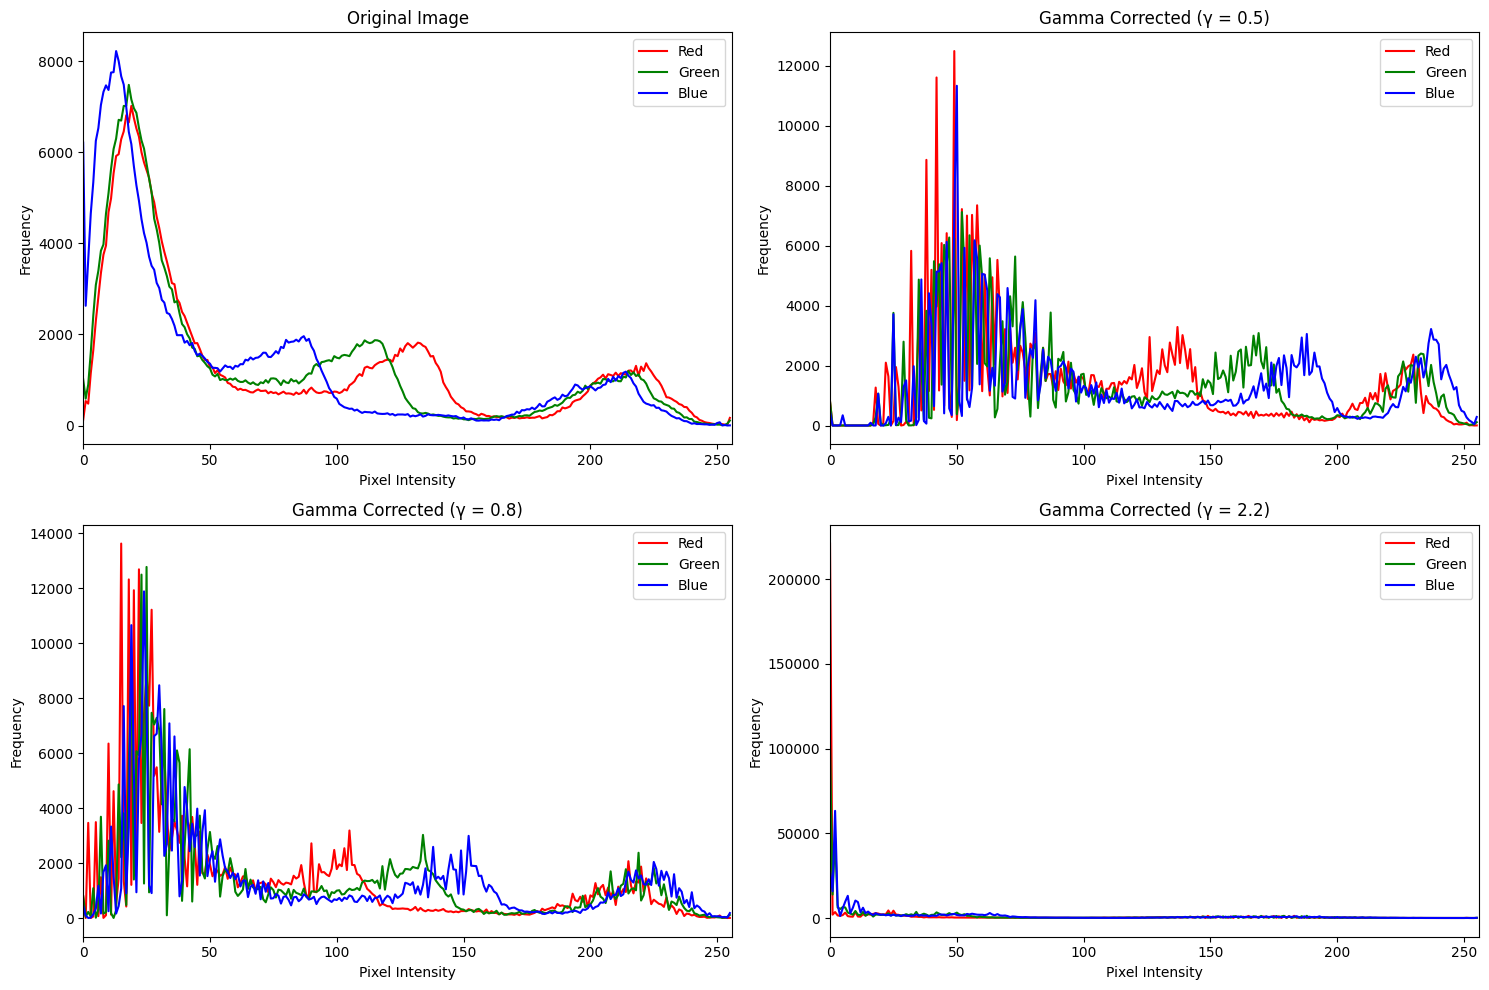

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
bgr_img = cv2.imread('a1images/highlights_and_shadows.jpg', cv2.IMREAD_COLOR)
assert bgr_img is not None, "Image not found."

# Convert BGR image to LAB color space
lab_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2Lab)

# Split into L, A, and B channels
L, A, B = cv2.split(lab_img)

# Normalize the L channel to [0, 1]
L_normalized = L / 255.0

# Define gamma values
gamma_values = [0.5, 0.8, 2.2]
corrected_images = []

# Apply gamma correction for each gamma value
for gamma in gamma_values:
    L_gamma_corrected = np.power(L_normalized, gamma)
    L_gamma_corrected = np.uint8(L_gamma_corrected * 255)
    
    # Merge the corrected L channel with A and B channels
    lab_gamma_corrected = cv2.merge((L_gamma_corrected, A, B))
    gamma_corrected_img = cv2.cvtColor(lab_gamma_corrected, cv2.COLOR_Lab2BGR)
    
    corrected_images.append(gamma_corrected_img)

# Function to plot histograms for each RGB channel
def plot_histograms(images, titles):
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(15, 10))

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 2, i + 1)
        for j, color in enumerate(colors):
            hist = cv2.calcHist([img], [j], None, [256], [0, 256])
            plt.plot(hist, color=color)
        plt.title(title)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.xlim([0, 256])
        plt.legend(['Red', 'Green', 'Blue'])

    plt.tight_layout()
    plt.show()

# Original image histogram
original_image_rgb = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
images_to_plot = [original_image_rgb] + corrected_images
titles = ['Original Image', 'Gamma Corrected (γ = 0.5)', 'Gamma Corrected (γ = 0.8)', 'Gamma Corrected (γ = 2.2)']

# Display the images
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Plot original and gamma corrected images
axs[0].set_title("Original Image")
axs[0].imshow(original_image_rgb)
axs[0].axis('off')

for i, (img, gamma) in enumerate(zip(corrected_images, gamma_values)):
    axs[i + 1].set_title(f"Gamma Corrected (γ = {gamma})")
    axs[i + 1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i + 1].axis('off')

plt.show()

# Plot histograms for original and corrected images
plot_histograms(images_to_plot, titles)


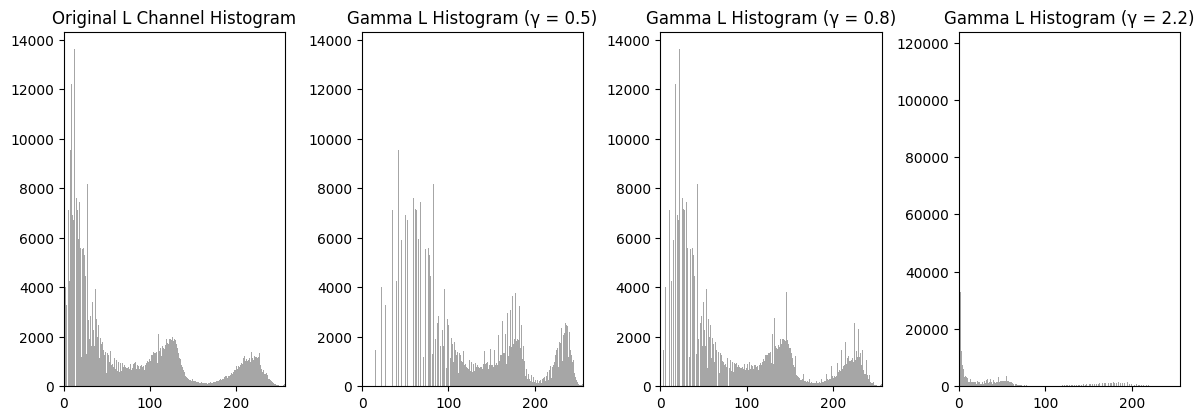

In [58]:
# Plot histograms for original and gamma-corrected L channels
plt.figure(figsize=(12, 8))

# Original L channel histogram
plt.subplot(2, 4, 1)
plt.hist(L.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title("Original L Channel Histogram")
plt.xlim([0, 256])

# Gamma corrected L channel histograms
for i, gamma in enumerate(gamma_values):
    plt.subplot(2, 4, i + 2)
    plt.hist(corrected_L_images[i].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    plt.title(f"Gamma L Histogram (γ = {gamma})")
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

#### Question 04

In [60]:
spider_img = cv2.imread("a1images/spider.png")

# convert the image into HSV 
hsv_spider_img = cv2.cvtColor(spider_img, cv2.COLOR_BGR2HSV)
hsv_spider_img.shape

(438, 780, 3)

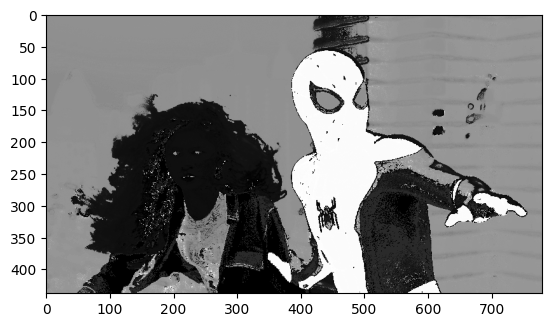

In [61]:
plt.imshow(hsv_spider_img[:,:,0], cmap="gray")

In [62]:
# split into planes
spider_hue_plane = hsv_spider_img[:,:,0]
spider_saturation_plane = hsv_spider_img[:,:,1] 
spider_value_plane = hsv_spider_img[:,:,2]

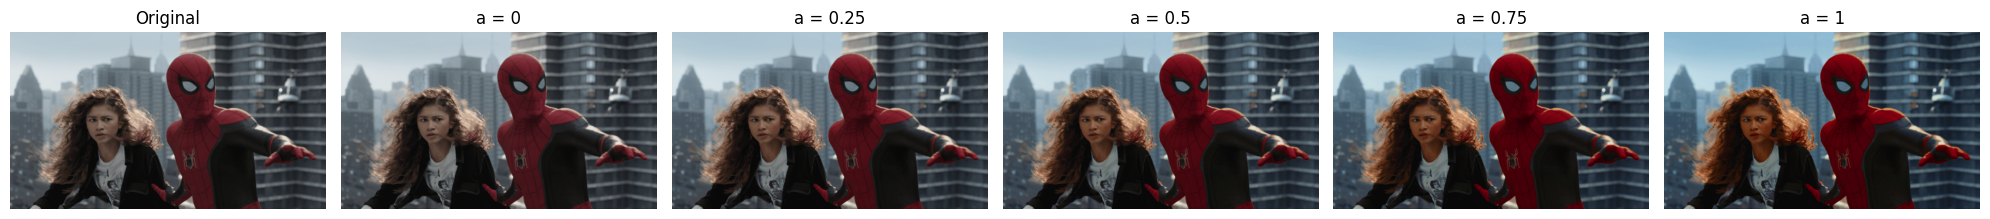

In [66]:

# Function for vibrancy transformation
def vibrancy_transformation(saturation_plane, a, sigma=70):
    x = saturation_plane.astype(float)
    return np.minimum(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255)

# List of a values to test
a_values = [0, 0.25, 0.5, 0.75, 1]

# Plotting results for original and transformed images
fig, axs = plt.subplots(nrows=1, ncols=len(a_values) + 1, figsize=(20, 10))

# Display original image in the first column
axs[0].set_title("Original")
axs[0].imshow(cv2.cvtColor(spider_img, cv2.COLOR_BGR2RGB))
axs[0].axis('off')

# Apply vibrancy transformation and display results
for id, a in enumerate(a_values):
    new_saturation_plane = vibrancy_transformation(spider_saturation_plane, a)

    # Merge back the HSV planes and convert to BGR
    new_hsv_img = cv2.merge([spider_hue_plane, new_saturation_plane.astype(np.uint8), spider_value_plane])
    new_bgr_img = cv2.cvtColor(new_hsv_img, cv2.COLOR_HSV2BGR)
    
    # Plot the transformed image
    axs[id + 1].set_title(f"a = {a}")
    axs[id + 1].imshow(cv2.cvtColor(new_bgr_img, cv2.COLOR_BGR2RGB))
    axs[id + 1].axis('off')

# Show all images
plt.tight_layout()
plt.show()

In [74]:
import cv2
import numpy as np

# Load and convert the image to HSV
spider_img = cv2.imread("a1images/spider.png")
hsv_spider_img = cv2.cvtColor(spider_img, cv2.COLOR_BGR2HSV)

# Split into HSV planes
spider_hue_plane = hsv_spider_img[:, :, 0]
spider_saturation_plane = hsv_spider_img[:, :, 1]
spider_value_plane = hsv_spider_img[:, :, 2]

# Function for vibrancy transformation
def vibrancy_transformation(saturation_plane, a, sigma=70):
    x = saturation_plane.astype(float)
    return np.minimum(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255)

# Callback function for the trackbar
def on_trackbar(val):
    # Scale the trackbar value to a [0,1] range
    a = val / 100.0
    
    # Apply the vibrancy transformation to the saturation plane
    new_saturation_plane = vibrancy_transformation(spider_saturation_plane, a).astype(np.uint8)
    
    # Merge the modified saturation plane with the original hue and value planes
    new_hsv_img = cv2.merge([spider_hue_plane, new_saturation_plane, spider_value_plane])
    
    # Convert the new HSV image back to BGR color space for display
    new_bgr_img = cv2.cvtColor(new_hsv_img, cv2.COLOR_HSV2BGR)
    
    # Display the transformed image
    cv2.imshow("Vibrancy Enhanced Image", new_bgr_img)

# Create a window to display the results
cv2.namedWindow("Vibrancy Enhanced Image")

# Create a trackbar that adjusts the value of 'a' (from 0 to 100, representing 0.0 to 1.0)
cv2.createTrackbar("a value", "Vibrancy Enhanced Image", 0, 100, on_trackbar)

# Display the original image initially
cv2.imshow("Vibrancy Enhanced Image", spider_img)

# Wait until a key is pressed
cv2.waitKey(0)

# Destroy all windows
cv2.destroyAllWindows()


after adjusting the a value in track bar, I selected a = 0.63 

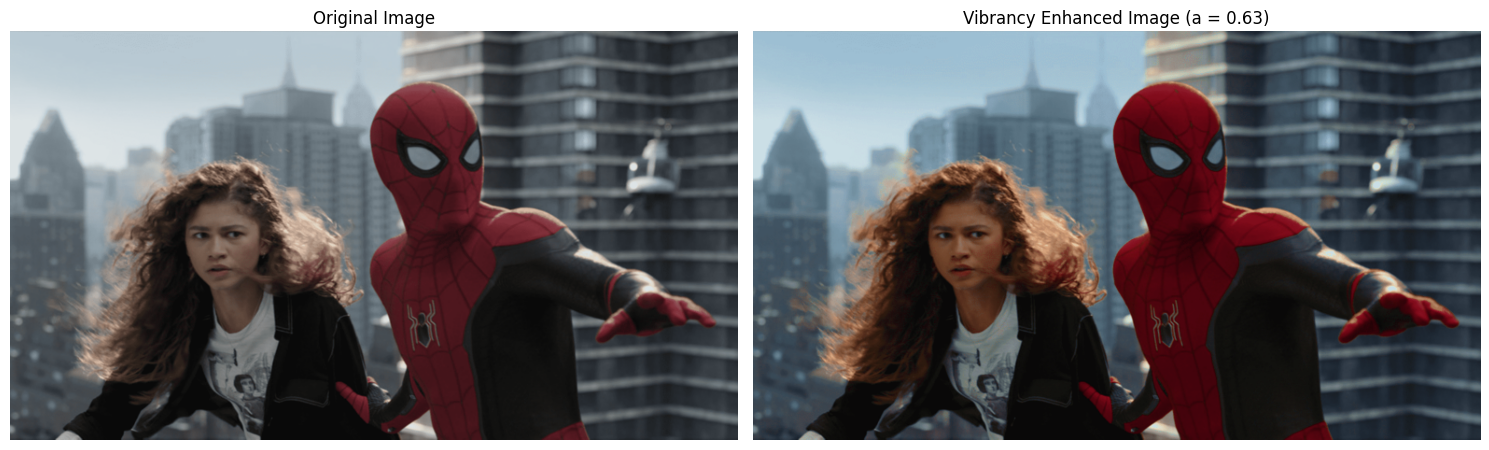

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image to HSV
spider_img = cv2.imread("a1images/spider.png")
hsv_spider_img = cv2.cvtColor(spider_img, cv2.COLOR_BGR2HSV)

# Split into HSV planes
spider_hue_plane = hsv_spider_img[:, :, 0]
spider_saturation_plane = hsv_spider_img[:, :, 1]
spider_value_plane = hsv_spider_img[:, :, 2]

# Function for vibrancy transformation
def vibrancy_transformation(saturation_plane, a, sigma=70):
    x = saturation_plane.astype(float)
    return np.minimum(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255)

# Recombine function to merge planes after transformation
def recombine_planes(hue_plane, new_saturation_plane, value_plane):
    new_hsv_img = cv2.merge([hue_plane, new_saturation_plane.astype(np.uint8), value_plane])
    new_bgr_img = cv2.cvtColor(new_hsv_img, cv2.COLOR_HSV2BGR)
    return new_bgr_img

# Apply the transformation to the saturation plane with a = 0.63
a = 0.63
new_saturation_plane = vibrancy_transformation(spider_saturation_plane, a)

# Recombine the planes to form the final image
final_image = recombine_planes(spider_hue_plane, new_saturation_plane, spider_value_plane)

# Convert BGR images to RGB for matplotlib display
original_rgb = cv2.cvtColor(spider_img, cv2.COLOR_BGR2RGB)
final_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

# Plot the original and vibrancy-enhanced images side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Original image
axs[0].imshow(original_rgb)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Vibrancy enhanced image
axs[1].imshow(final_rgb)
axs[1].set_title("Vibrancy Enhanced Image (a = 0.63)")
axs[1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()


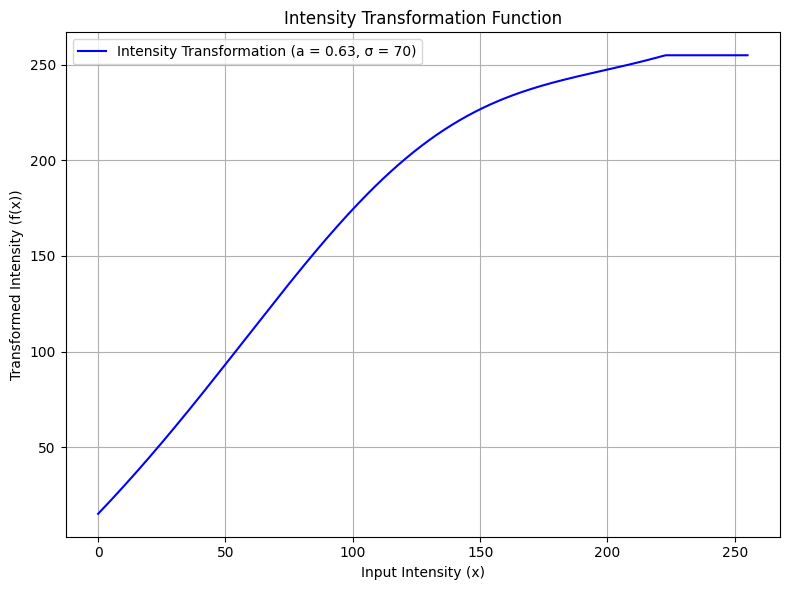

In [77]:
# Define the vibrancy transformation function
def vibrancy_transformation_function(x, a, sigma=70):
    return np.minimum(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

# Set values of 'a' and 'sigma'
a = 0.63
sigma = 70

# Generate input intensity values (x) from 0 to 255
x_values = np.arange(0, 256)

# Apply the vibrancy transformation to the intensity values
y_values = vibrancy_transformation_function(x_values, a, sigma)

# Plot the intensity transformation
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, color="blue", label=f"Intensity Transformation (a = {a}, σ = {sigma})")
plt.title("Intensity Transformation Function")
plt.xlabel("Input Intensity (x)")
plt.ylabel("Transformed Intensity (f(x))")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

#### Question 05

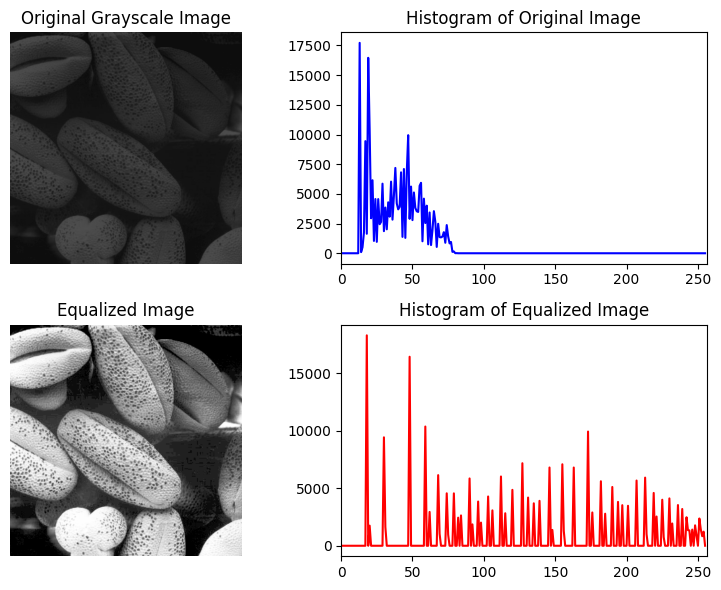

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the histogram of the original image
    hist_orig, bins_orig = np.histogram(gray_image.flatten(), 256, [0, 256])

    # Calculate the cumulative distribution function (CDF)
    cdf = hist_orig.cumsum()
    
    # Normalize CDF
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())  # Normalize

    # Use the CDF to map the pixel values of the original image
    equalized_image = np.interp(gray_image.flatten(), bins_orig[:-1], cdf_normalized).reshape(gray_image.shape).astype(np.uint8)

    # Compute the histogram of the equalized image
    hist_eq, bins_eq = np.histogram(equalized_image.flatten(), 256, [0, 256])

    return gray_image, equalized_image, hist_orig, hist_eq, cdf_normalized

# Load the image
image = cv2.imread("a1images/shells.tif")  # Update the path as needed

# Perform histogram equalization
gray_image, equalized_image, hist_orig, hist_eq, cdf_normalized = histogram_equalization(image)

# Plot histograms and images
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Original image and histogram
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Grayscale Image")
axs[0, 0].axis("off")
axs[0, 1].plot(hist_orig, color='blue')
axs[0, 1].set_title("Histogram of Original Image")
axs[0, 1].set_xlim([0, 256])

# Equalized image and histogram
axs[1, 0].imshow(equalized_image, cmap='gray')
axs[1, 0].set_title("Equalized Image")
axs[1, 0].axis("off")
axs[1, 1].plot(hist_eq, color='red')
axs[1, 1].set_title("Histogram of Equalized Image")
axs[1, 1].set_xlim([0, 256])

plt.tight_layout()
plt.show()


#### Question 06

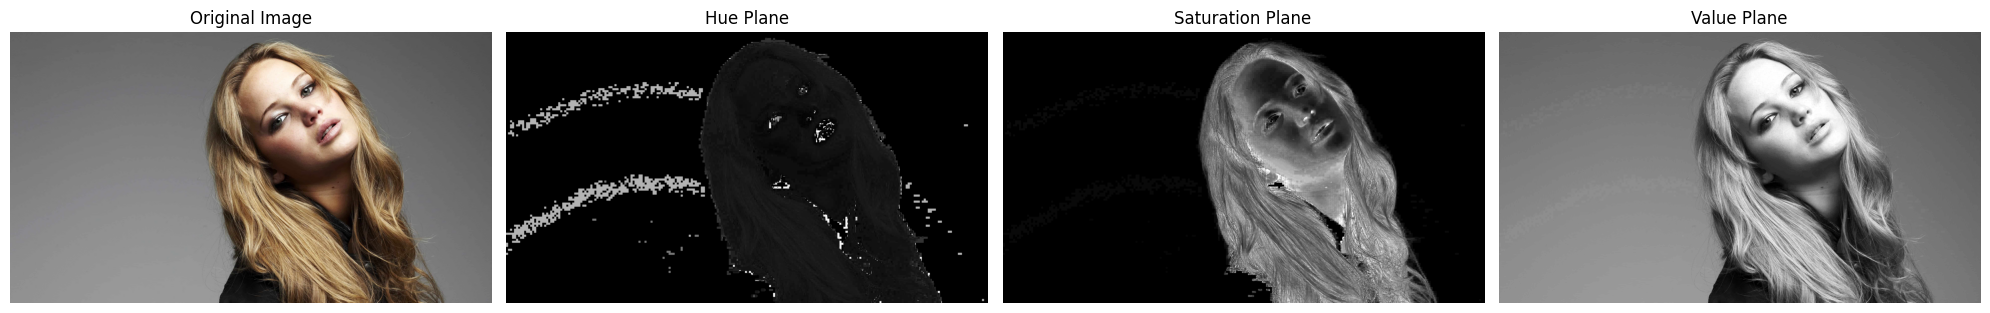

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("a1images/jeniffer.jpg")
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value planes
hue_plane, saturation_plane, value_plane = cv2.split(hsv_image)

# Display the hue, saturation, and value planes in grayscale
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(rgb_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(hue_plane, cmap='gray')
plt.title("Hue Plane")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(saturation_plane, cmap='gray')
plt.title("Saturation Plane")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(value_plane, cmap='gray')
plt.title("Value Plane")
plt.axis("off")

plt.tight_layout()
plt.show()


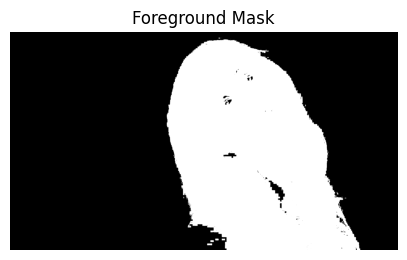

In [109]:
# Create the foreground mask based on the saturation plane
foreground_mask = saturation_plane > 14
# Display the foreground mask
plt.figure(figsize=(5, 5))
plt.title("Foreground Mask")
plt.imshow(foreground_mask, cmap='gray')
plt.axis("off")
plt.show()

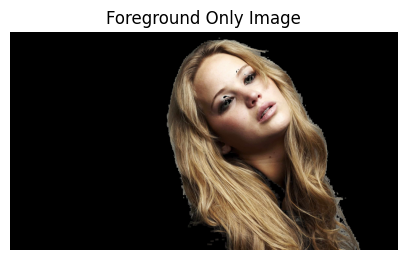

In [110]:
# Get the foreground only from the image
foreground_only = cv2.bitwise_and(image , image, mask=foreground_mask.astype(np.uint8))

# Display the foreground only image
plt.figure(figsize=(5, 5))
plt.title("Foreground Only Image")
plt.imshow(cv2.cvtColor(foreground_only, cv2.COLOR_BGR2RGB)) 
plt.axis("off") 
plt.show()


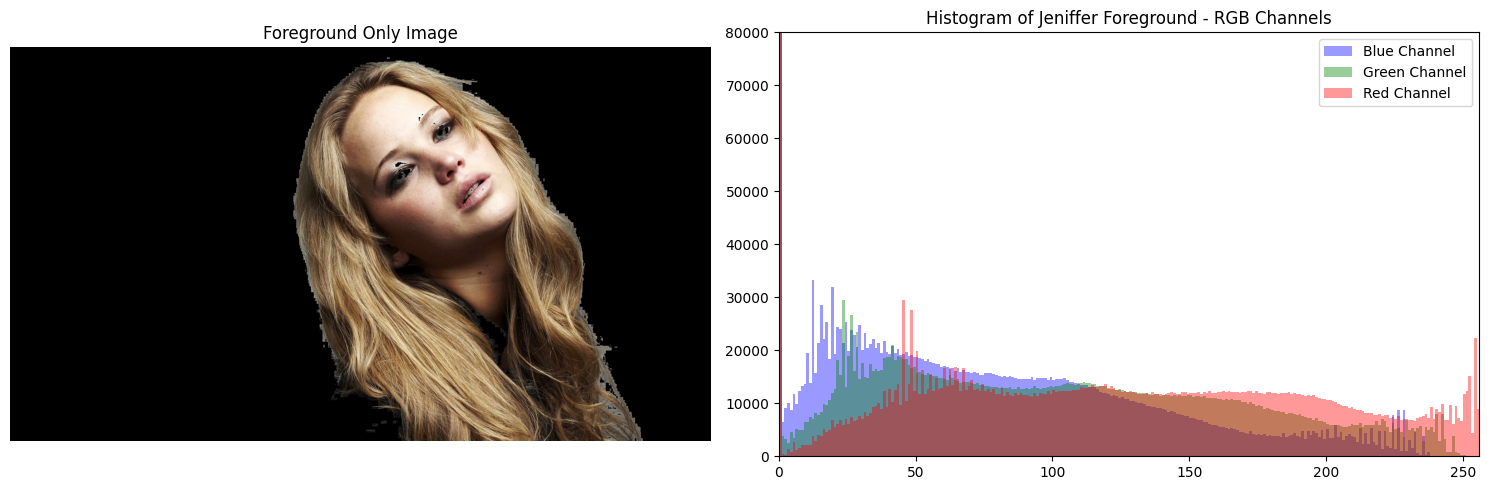

In [115]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Show the foreground only image
axs[0].set_title("Foreground Only Image")
axs[0].imshow(cv2.cvtColor(foreground_only, cv2.COLOR_BGR2RGB))
axs[0].axis("off")

# Histogram
axs[1].set_title("Histogram of Jeniffer Foreground - RGB Channels")
axs[1].hist(foreground_only[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
axs[1].hist(foreground_only[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
axs[1].hist(foreground_only[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
axs[1].set_xlim([0, 256])
axs[1].set_ylim([0, 80000])
axs[1].legend()


plt.tight_layout()
plt.show()


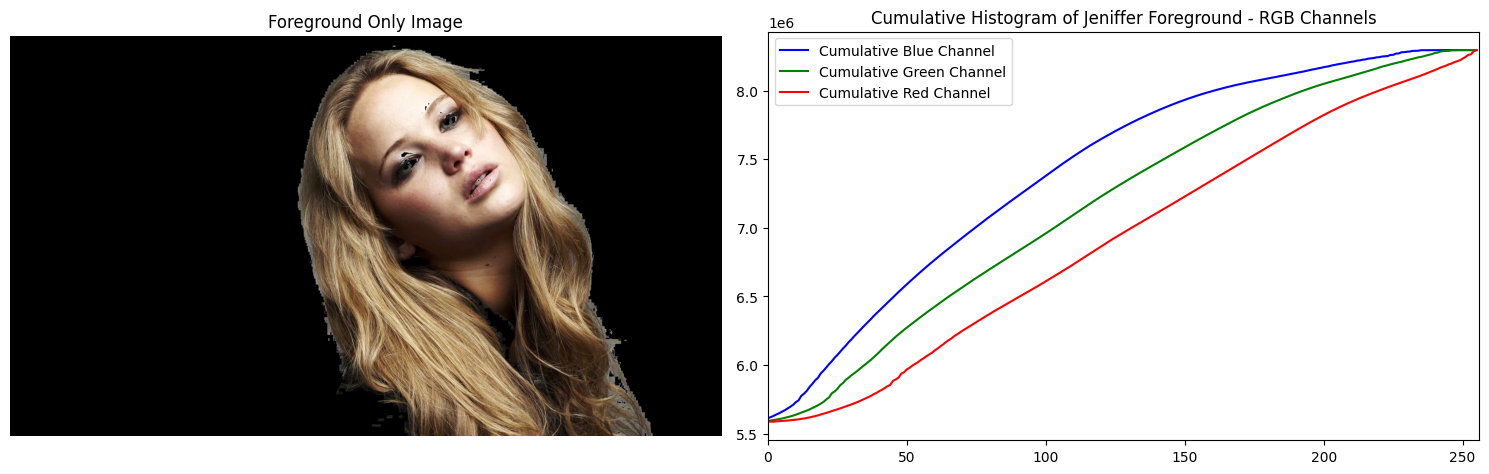

In [116]:
# Compute histograms for each color channel
hist_b = cv2.calcHist([foreground_only], [0], None, [256], [0, 256])  
hist_g = cv2.calcHist([foreground_only], [1], None, [256], [0, 256])  
hist_r = cv2.calcHist([foreground_only], [2], None, [256], [0, 256]) 

# Obtain the cumulative sum of the histograms
cumsum_b = np.cumsum(hist_b)
cumsum_g = np.cumsum(hist_g)
cumsum_r = np.cumsum(hist_r)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].set_title("Foreground Only Image")
axs[0].imshow(cv2.cvtColor(foreground_only, cv2.COLOR_BGR2RGB))  
axs[0].axis("off") 

axs[1].set_title("Cumulative Histogram of Jeniffer Foreground - RGB Channels")
axs[1].plot(cumsum_b, color='b', label='Cumulative Blue Channel')
axs[1].plot(cumsum_g, color='g', label='Cumulative Green Channel')
axs[1].plot(cumsum_r, color='r', label='Cumulative Red Channel')
axs[1].set_xlim([0, 256])  
axs[1].legend()

# Show the figure
plt.tight_layout()
plt.show()
